Experiment 6 : Decision Tree and K-nearest neighbour

Let’s use a built-in dataset (like Iris) from sklearn.datasets to make this easy and reproducible.


In [1]:
# Decision Tree vs K-Nearest Neighbors Experiment
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
# --------------------------------------------------------
# Step 1: Load and prepare data (only 2 features for 2D plot)
# --------------------------------------------------------
iris = load_iris()
X = iris.data[:, :2]   # take first 2 features for easy 2D visualization
y = iris.target
feature_names = iris.feature_names[:2]
target_names = iris.target_names

In [18]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

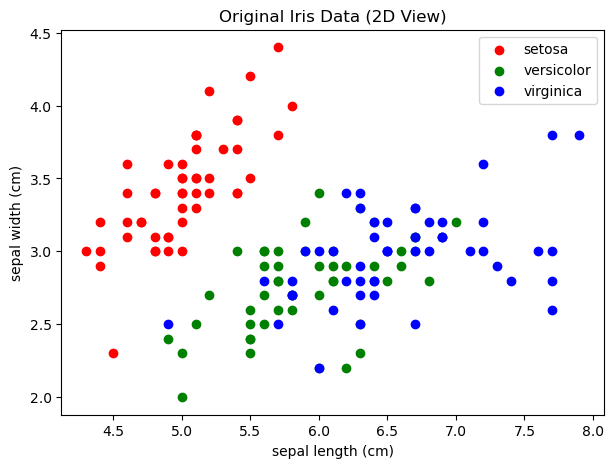

In [19]:
# --------------------------------------------------------
# Step 2: Visualize Original Data
# --------------------------------------------------------
plt.figure(figsize=(7,5))
for i, color in zip(range(3), ['red', 'green', 'blue']):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_names[i], color=color)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Original Iris Data (2D View)")
plt.legend()
plt.show()


In [20]:
# ========================================================
# Step 3: Decision Tree Visualization
# ========================================================

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [22]:
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


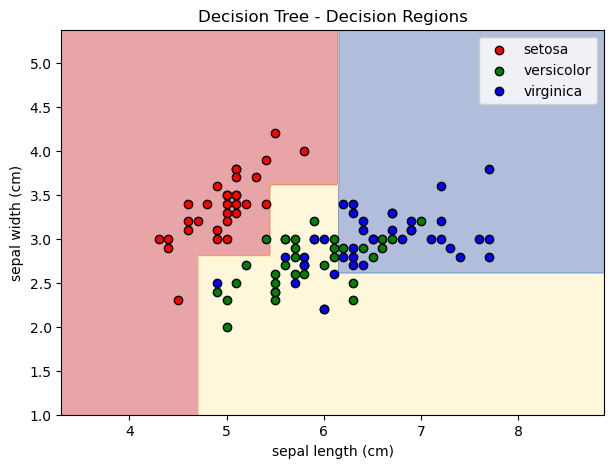

In [24]:
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
for i, color in zip(range(3), ['red', 'green', 'blue']):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1],
                label=target_names[i], color=color, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Tree - Decision Regions")
plt.legend()
plt.show()

In [25]:
# ========================================================
# Step 4: K-Nearest Neighbor Visualization
# ========================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [27]:
# Create meshgrid for visualization
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [28]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


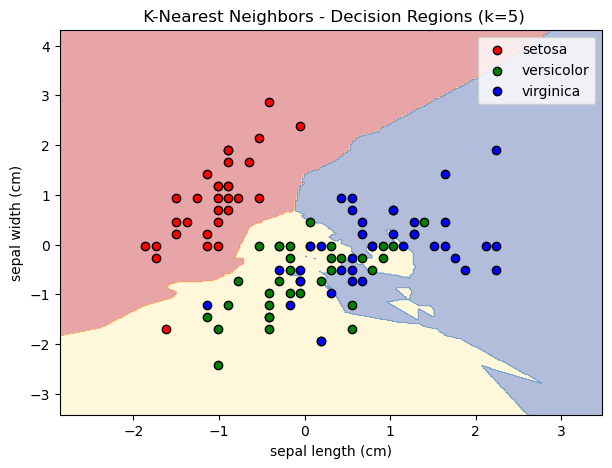

In [30]:
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
for i, color in zip(range(3), ['red', 'green', 'blue']):
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1],
                label=target_names[i], color=color, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(" K-Nearest Neighbors - Decision Regions (k=5)")
plt.legend()
plt.show()

In [31]:
# ========================================================
# Step 5: Find which model performs better
# ========================================================

from sklearn.metrics import accuracy_score

# Evaluate both models on the same test data
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test_scaled)

acc_dt = accuracy_score(y_test, y_pred_dt)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Decision Tree Accuracy:", round(acc_dt, 3))
print(" KNN Accuracy:", round(acc_knn, 3))

if acc_dt > acc_knn:
    print("\n Decision Tree performed better on this dataset.")
elif acc_knn > acc_dt:
    print("\n K-Nearest Neighbors performed better on this dataset.")
else:
    print("\n Both models performed equally well on this dataset.")


Decision Tree Accuracy: 0.756
 KNN Accuracy: 0.822

 K-Nearest Neighbors performed better on this dataset.
